<a href="https://colab.research.google.com/github/Varsha1114/Experiment-6/blob/main/weather_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trained Model Parameters: a = 0.449, b = -0.383, c = 0.574
Mean Squared Error of the model: 0.092


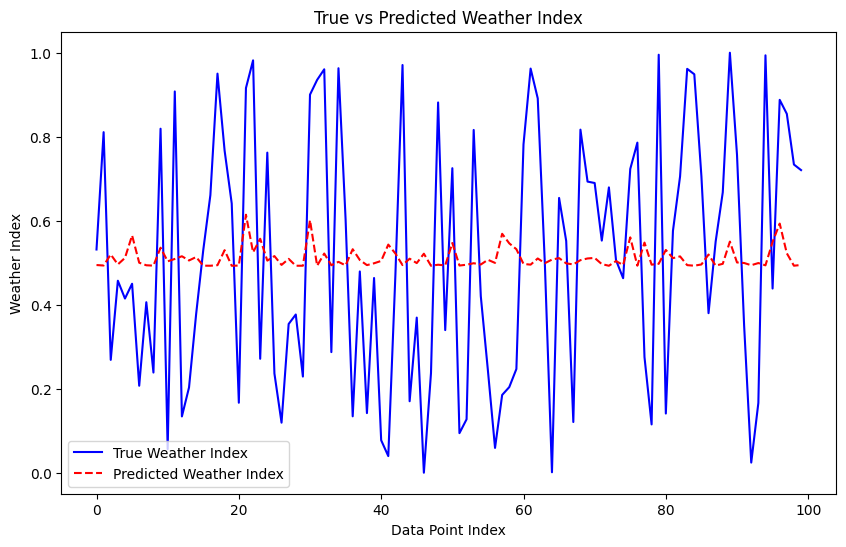

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Acquisition
def acquire_data():
    # Simulated historical weather data: temperature and humidity as input, weather index as output
    data = {
        "temperature": np.random.uniform(15, 35, 100),
        "humidity": np.random.uniform(30, 80, 100),
        "weather_index": np.random.uniform(50, 100, 100)  # Simulated target variable
    }
    return data

# Step 2: Data Preprocessing
def preprocess_data(data):
    # Normalize the data for better model performance
    for key in data:
        data[key] = (data[key] - np.min(data[key])) / (np.max(data[key]) - np.min(data[key]))
    return data

# Step 3: Model Formulation
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Step 4: Implementation
def train_model(data):
    from scipy.optimize import curve_fit

    # Combine temperature and humidity into a single feature for simplicity
    x = 0.5 * (data["temperature"] + data["humidity"])
    y = data["weather_index"]

    # Fit the quadratic model
    popt, _ = curve_fit(quadratic_model, x, y)
    return popt

# Step 5: Verification
def test_model(data, model_params):
    x = 0.5 * (data["temperature"] + data["humidity"])
    y_true = data["weather_index"]
    y_pred = quadratic_model(x, *model_params)

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred)**2)
    return mse, y_true, y_pred

# Step 6: Deployment
if __name__ == "__main__":
    # Acquire data
    raw_data = acquire_data()

    # Preprocess data
    processed_data = preprocess_data(raw_data)

    # Train the model
    model_parameters = train_model(processed_data)
    print("Trained Model Parameters: a = {:.3f}, b = {:.3f}, c = {:.3f}".format(*model_parameters))

    # Test the model
    mse, y_true, y_pred = test_model(processed_data, model_parameters)
    print("Mean Squared Error of the model: {:.3f}".format(mse))

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label="True Weather Index", color="blue")
    plt.plot(y_pred, label="Predicted Weather Index", color="red", linestyle="--")
    plt.title("True vs Predicted Weather Index")
    plt.xlabel("Data Point Index")
    plt.ylabel("Weather Index")
    plt.legend()
    plt.show()
